# Latitude & Longitude plotting

In [1]:
import pandas as pd
import numpy as np

In [8]:
# Import data
data = pd.read_csv("../data/train.csv").sort_values('id')
x = data.loc[:, data.columns != 'price']
y = data['price'].values

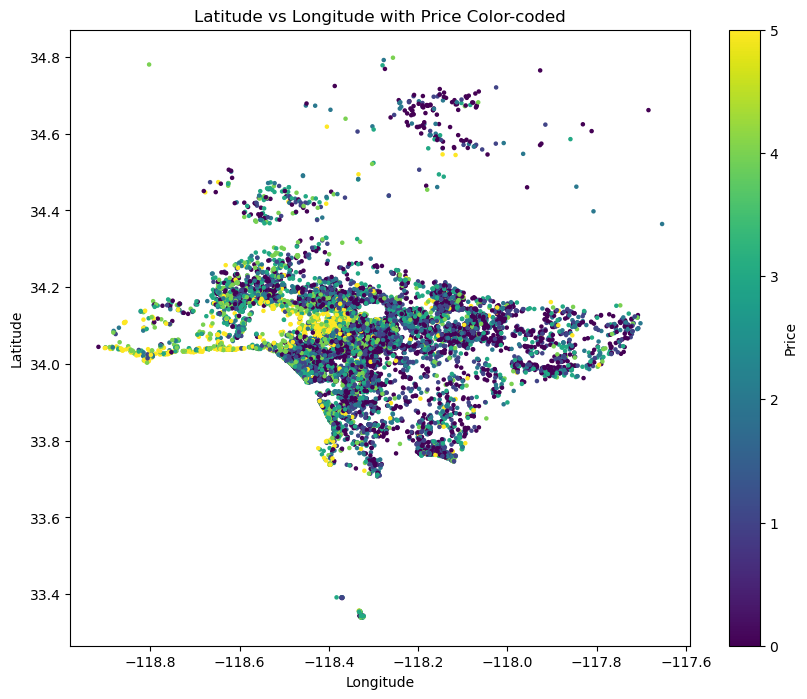

In [73]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['price'], cmap='viridis', s=5)

# Add colorbar
plt.colorbar(scatter, label='Price')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude with Price Color-coded')

# Show the plot
plt.show()

### Plots seprated by room_type

In [21]:
# Extract unique property types
types = data['room_type'].values
unique_types = np.array(list(set(types)))

print(unique_types)

# Count number of each type
counts = {}
for t in types:
    if t not in counts:
        counts[t] = 0
    counts[t] += 1

# Plot property type counts
'''
plt.hist(counts.values(), range=(0, 7001), bins=70, color='blue', alpha=0.7)
plt.grid(True)
plt.show()
'''

# Get significant types
#mask = [counts[t] >= 100 for t in unique_types]
#sig_types = unique_types[mask]

['Entire home/apt' 'Shared room' 'Hotel room' 'Private room']


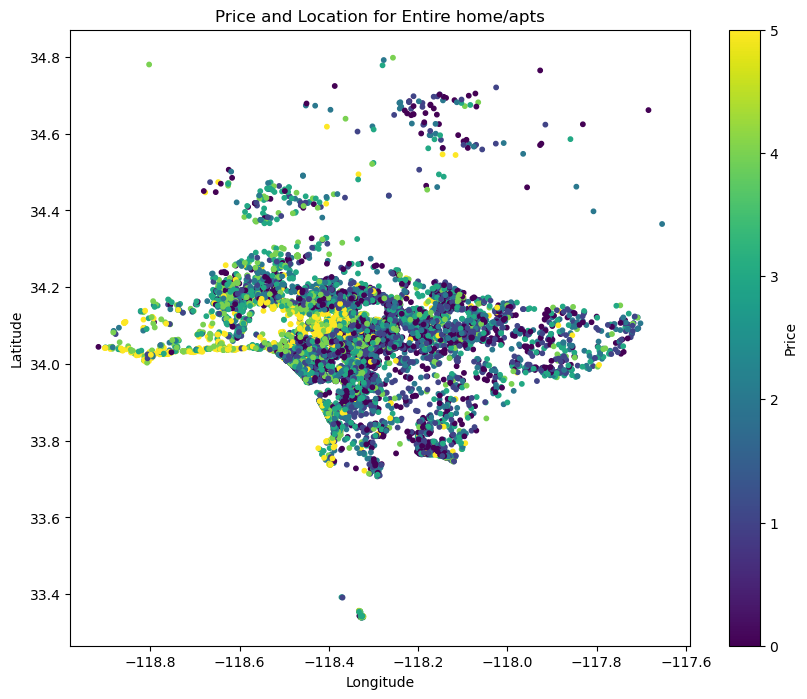

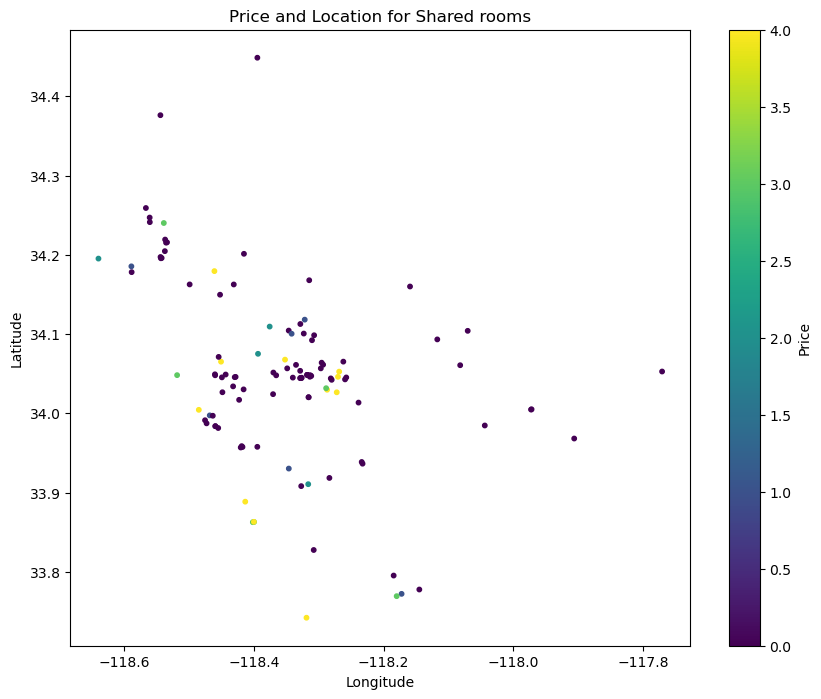

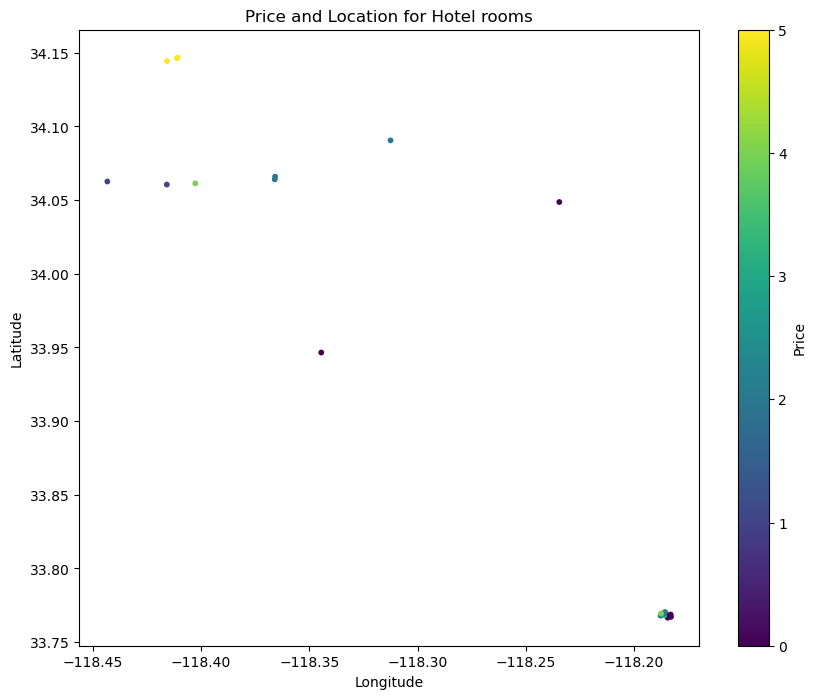

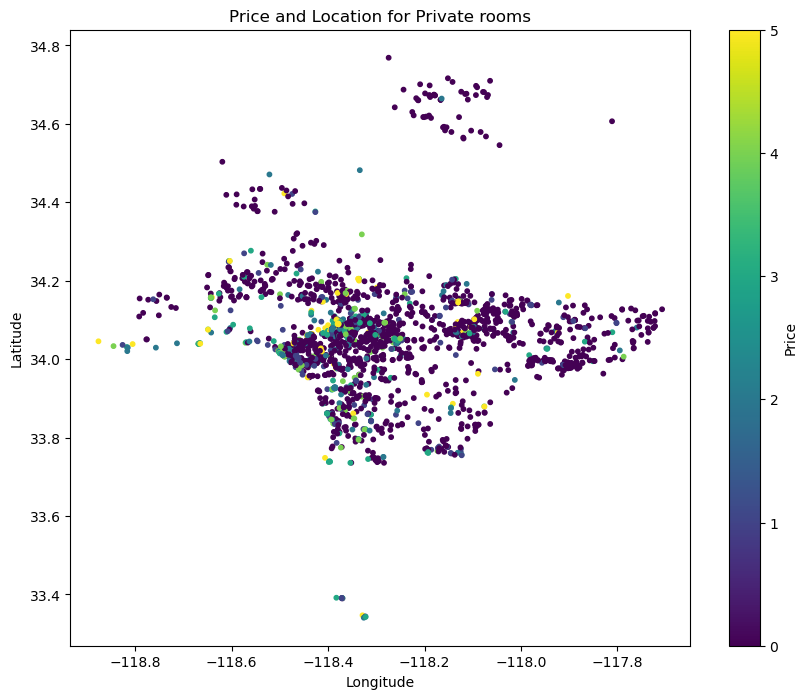

In [22]:
import matplotlib.pyplot as plt

for t in unique_types:
    current_data = data.loc[data['room_type'] == t]
    
    # Scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(current_data['longitude'], current_data['latitude'], c=current_data['price'], cmap='viridis', s=10)

    # Add colorbar
    plt.colorbar(scatter, label='Price')

    # Set labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Price and Location for {t}s')

    # Show the plot
    plt.show()
    

### Plots seperated by number of bedrooms

In [ ]:
# Dealing with empty 'beds' value

for idx, row in enumerate(data.loc[data['beds'].isna()]):
    if row['room_type'] == 'Entire home/apt':
        # Look up redux for {number}-bed in description
        row['beds'] = 1  # Set equal to number
    else:
        row['beds'] = 1  # Change to correct syntax

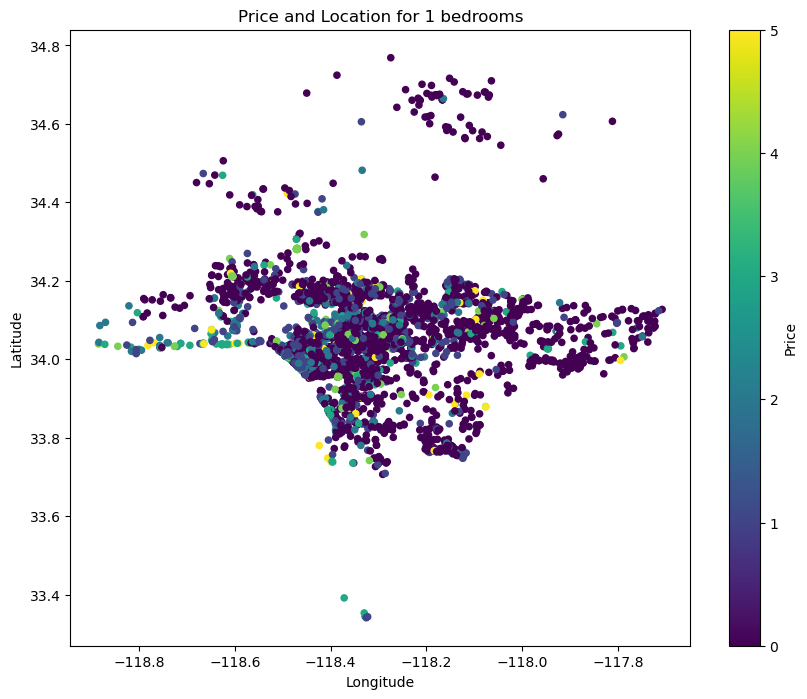

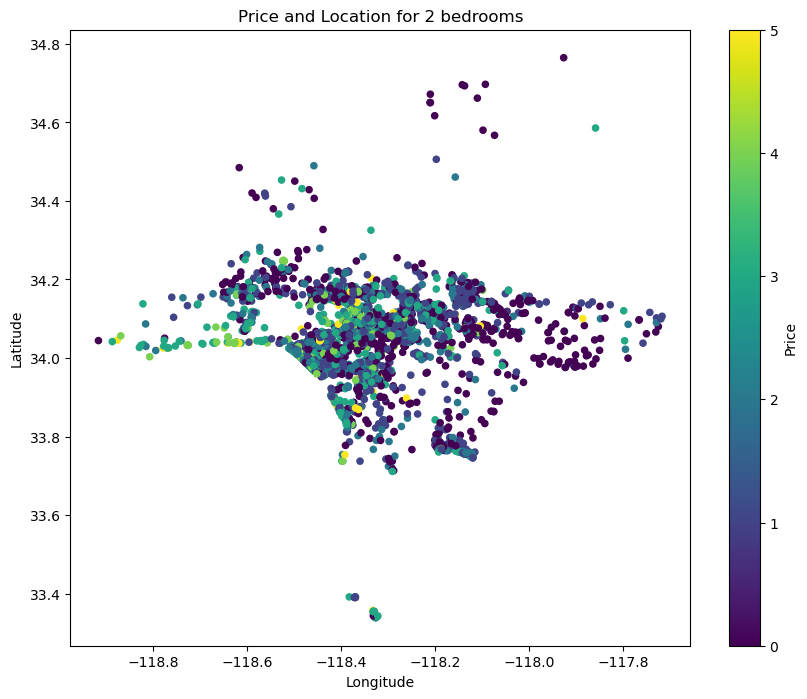

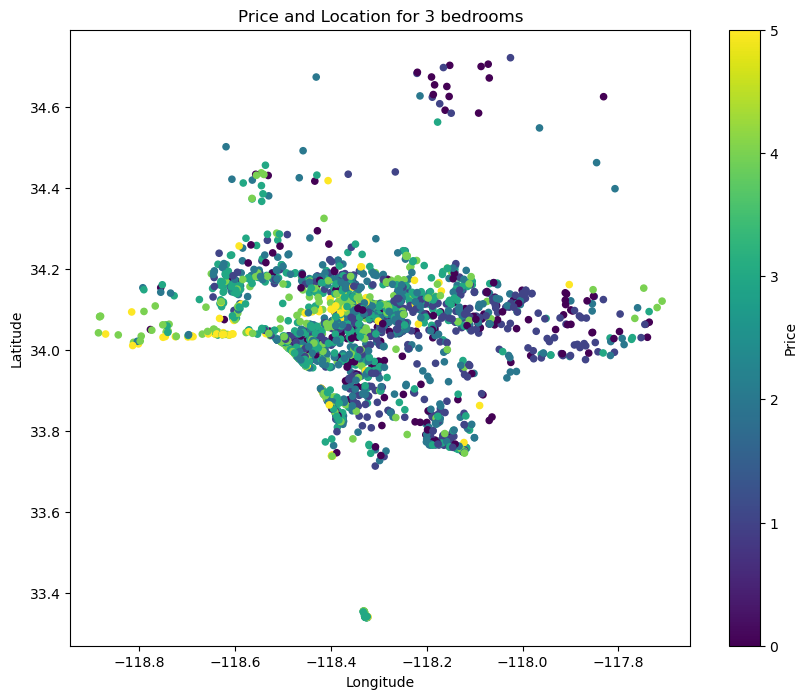

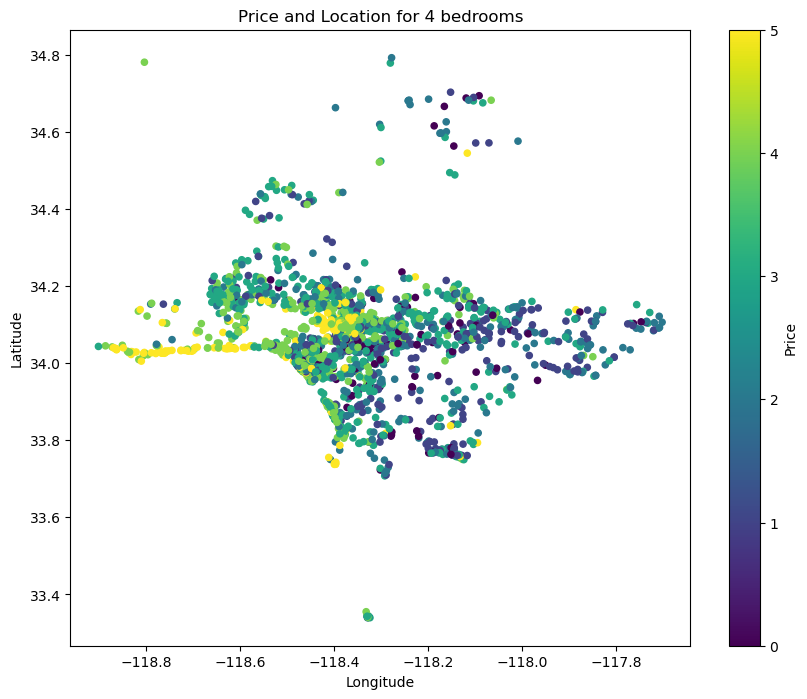

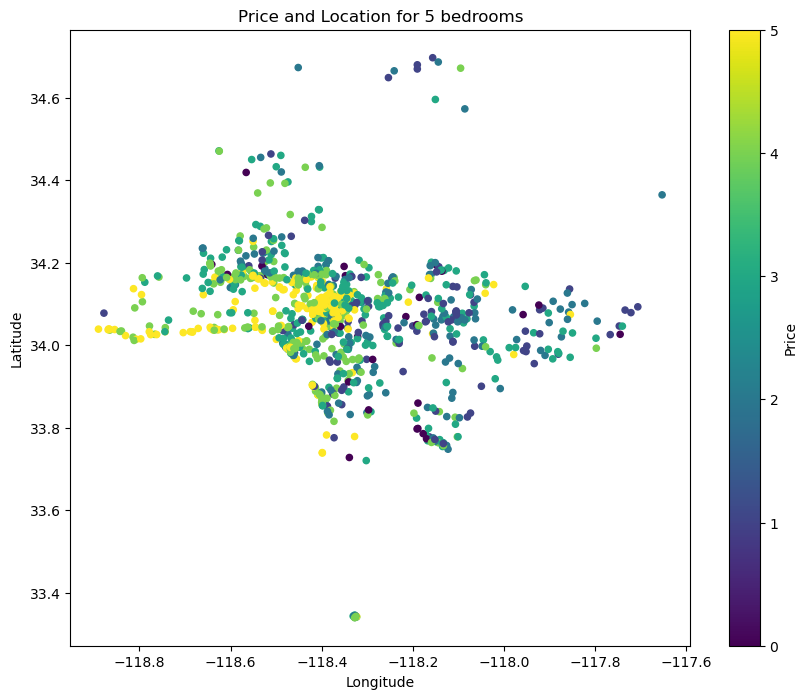

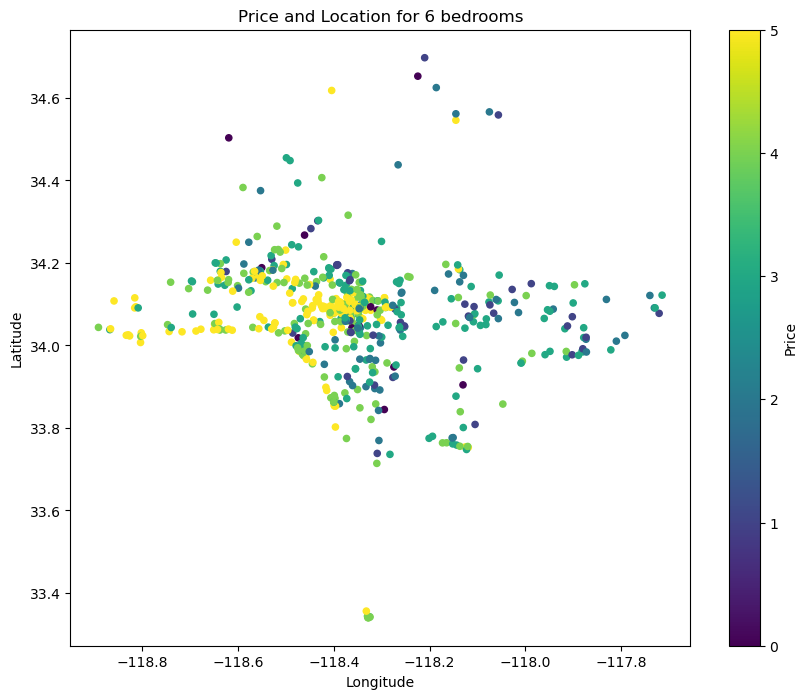

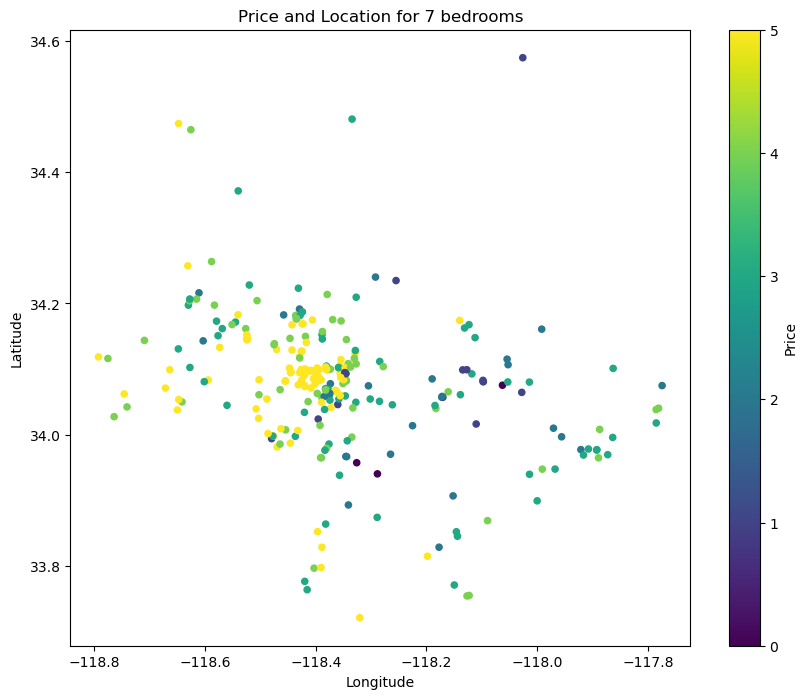

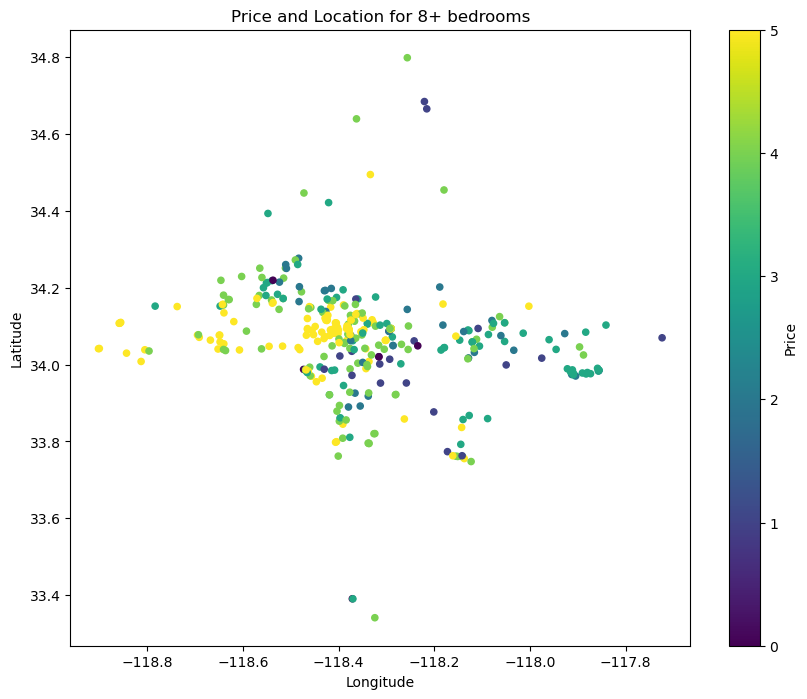

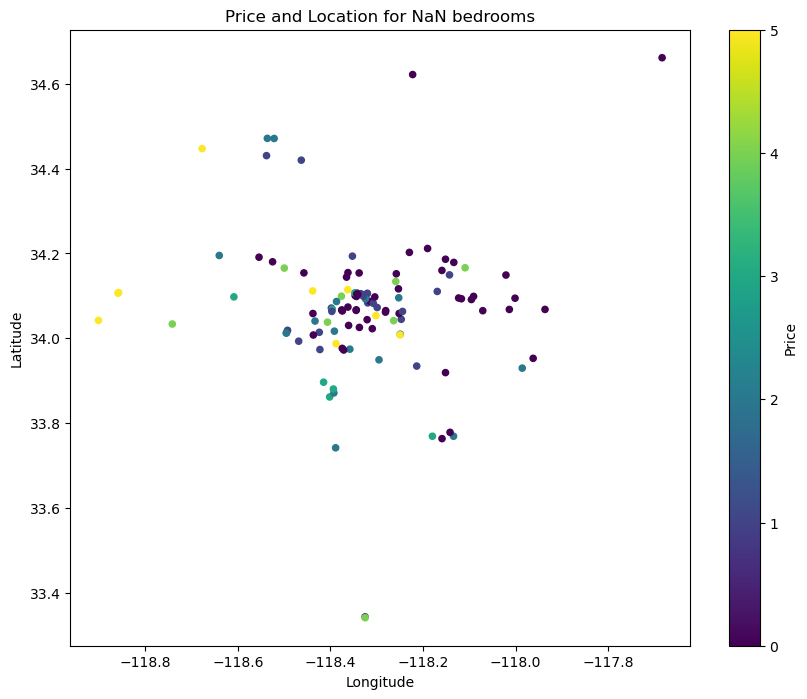

In [10]:
bedroom_categories = list(range(1, 8)) + ['8+', 'NaN']

for cat in bedroom_categories:
    # Select data for the current bedroom category
    if cat == 'NaN':
        # Handle np.nan values
        current_data = data.loc[data['beds'].isna()]
    elif cat == '8+':
        # Handle listings with 8 or more bedrooms
        current_data = data.loc[data['beds'] >= 8]
    else:
        # Handle listings with the specified number of bedrooms
        current_data = data.loc[data['beds'] == cat]
    
    # Scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(current_data['longitude'], current_data['latitude'], c=current_data['price'], cmap='viridis', s=20)

    # Add colorbar
    plt.colorbar(scatter, label='Price')

    # Set labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Price and Location for {cat} bedrooms')

    # Show the plot
    plt.show()

### Separated by accommodation number

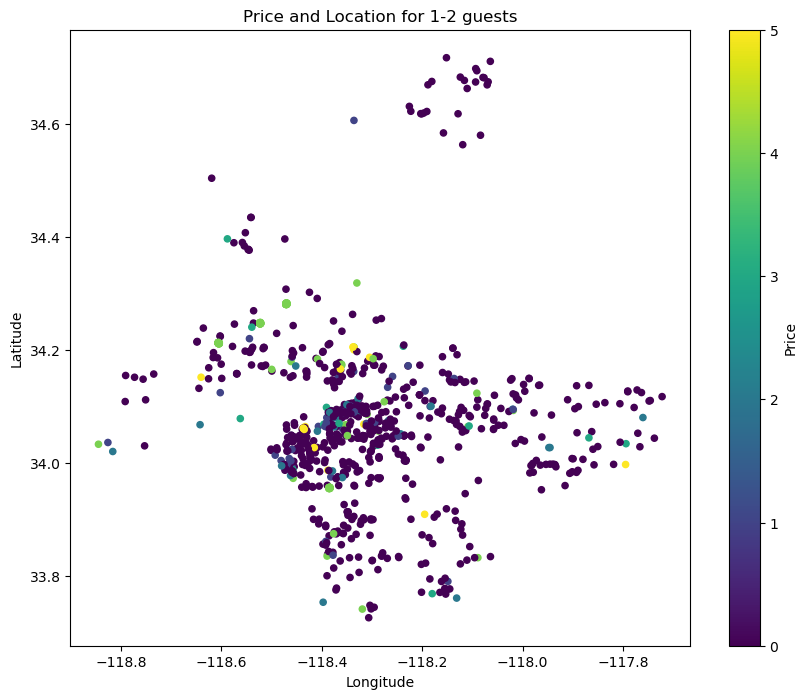

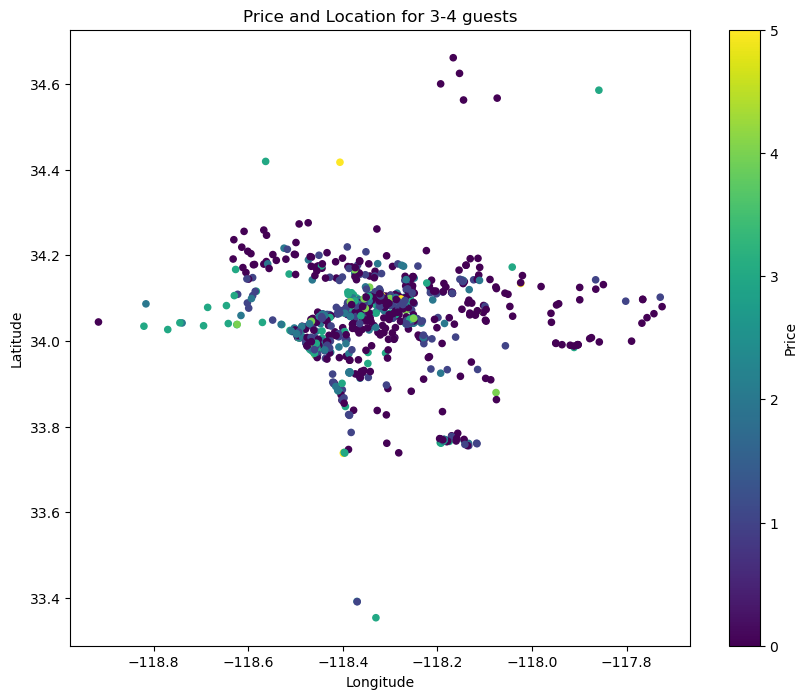

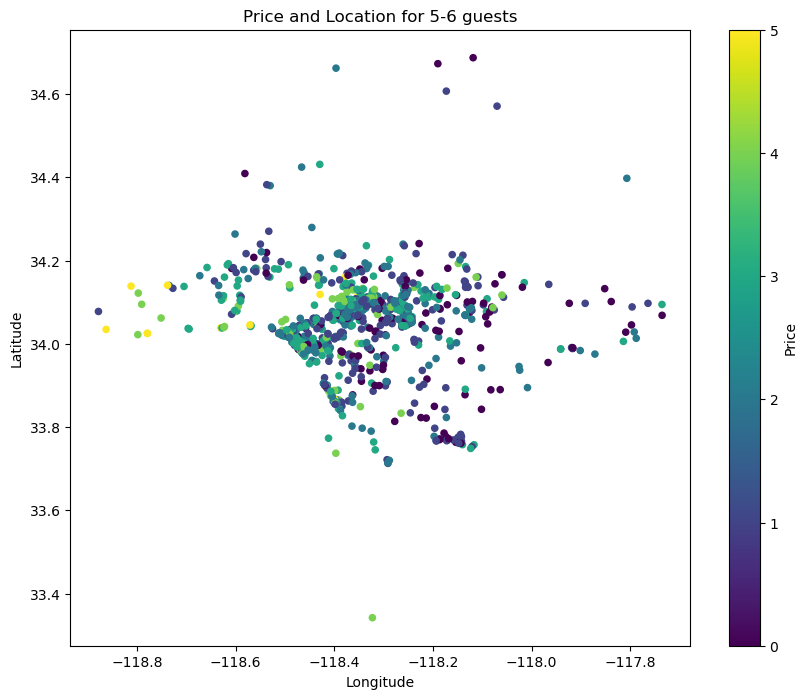

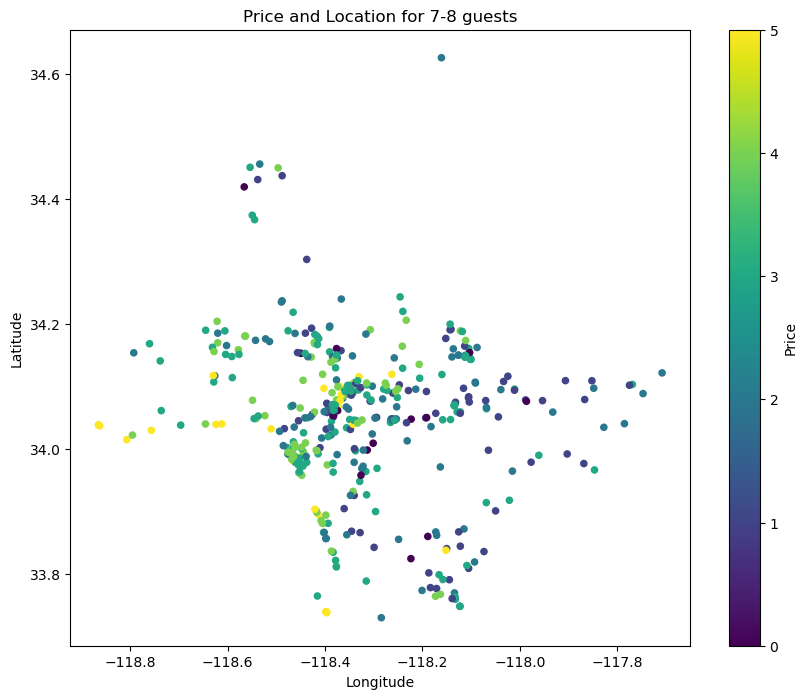

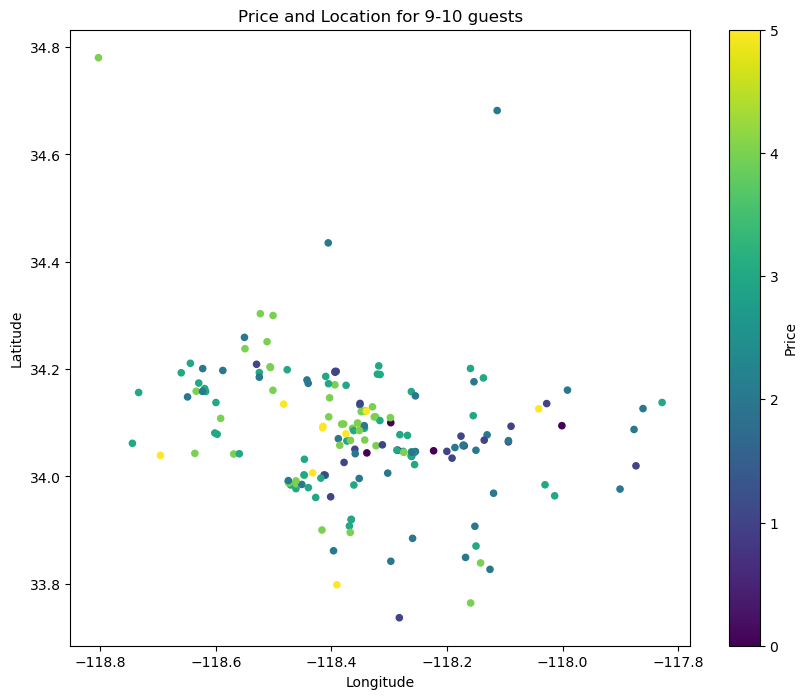

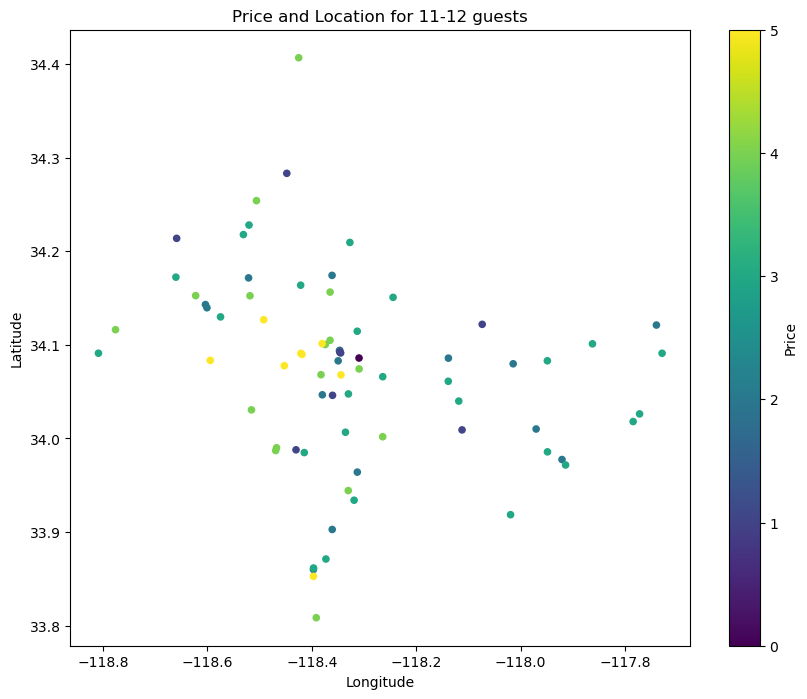

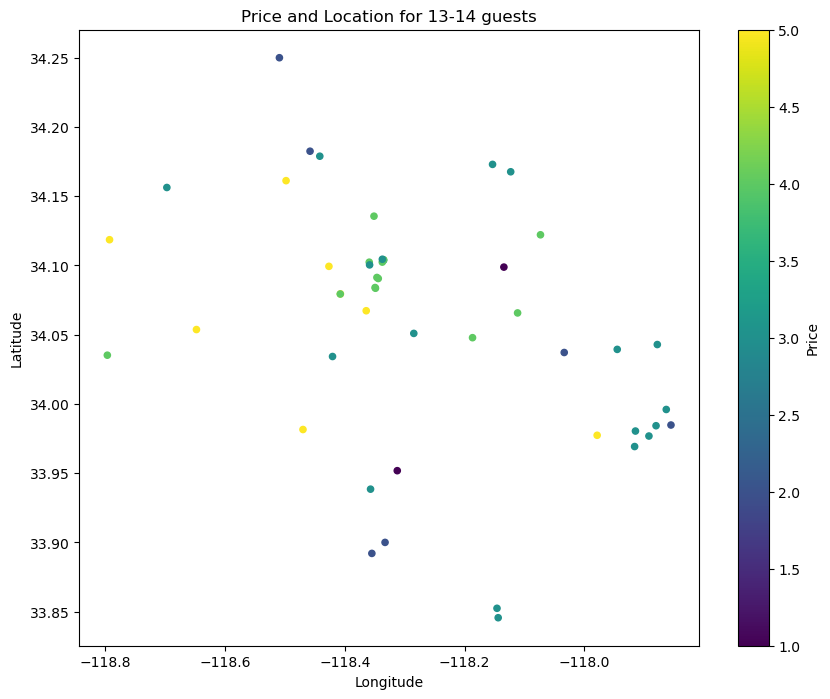

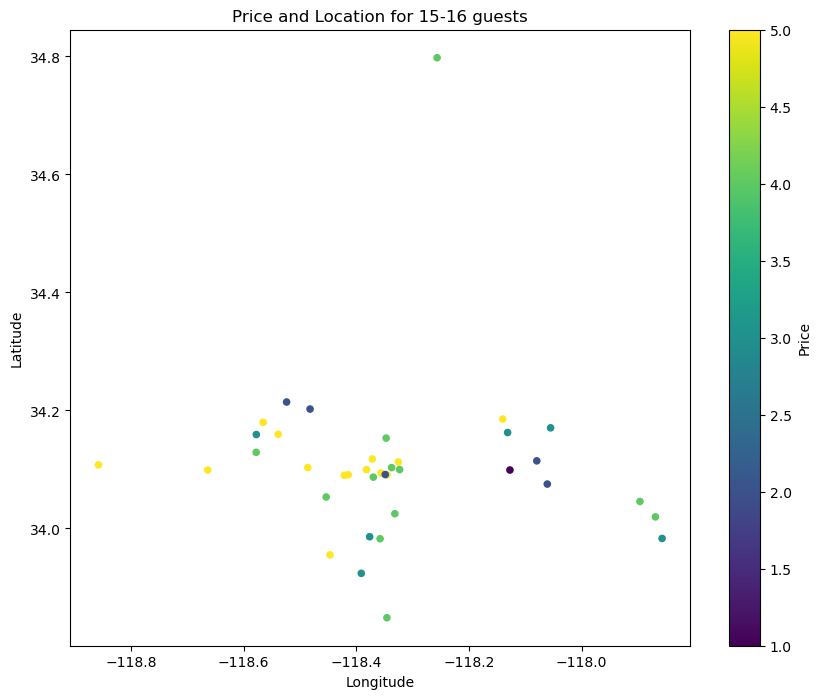

In [24]:
categories = list(range(1, 17, 2))

for cat in categories:
    # Select data for the current bedroom category
    current_data = data.loc[data['accommodates'] == cat]
    
    # Scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(current_data['longitude'], current_data['latitude'], c=current_data['price'], cmap='viridis', s=20)

    # Add colorbar
    plt.colorbar(scatter, label='Price')

    # Set labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Price and Location for {cat}-{cat+1} guests')

    # Show the plot
    plt.show()

### Separated by number of amenities

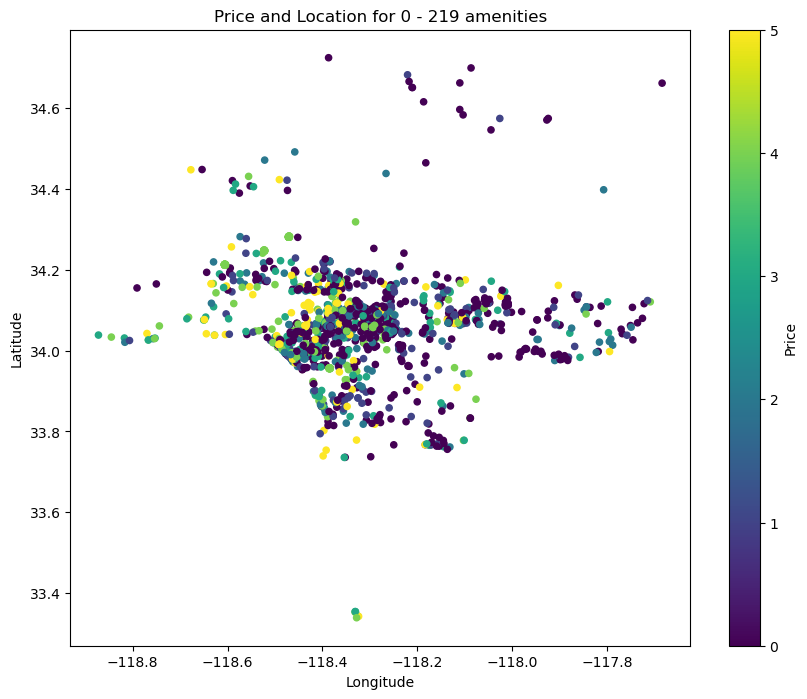

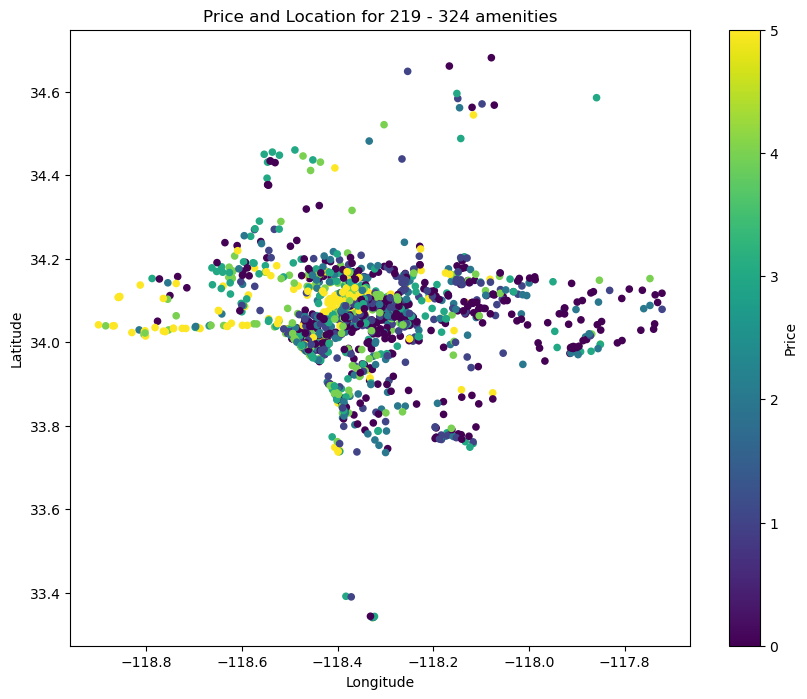

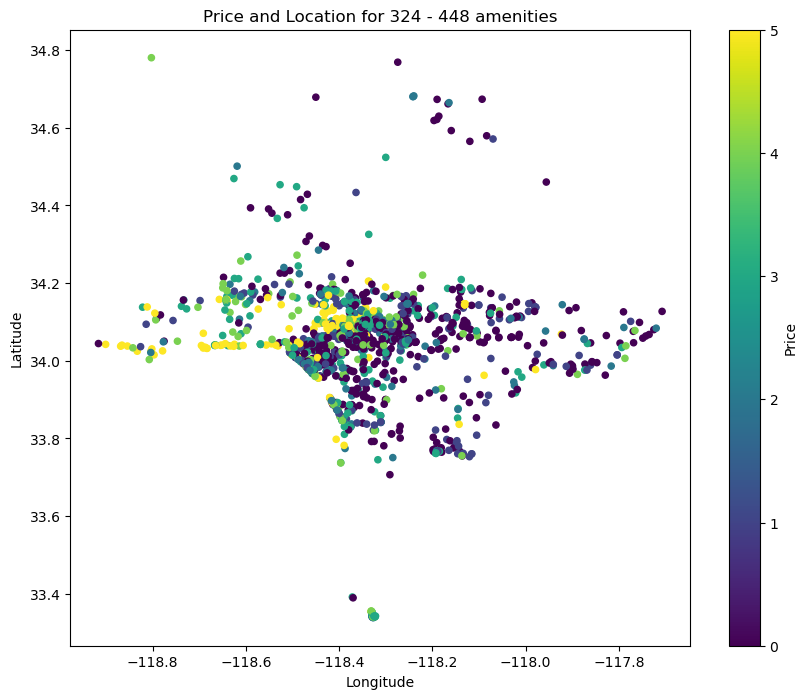

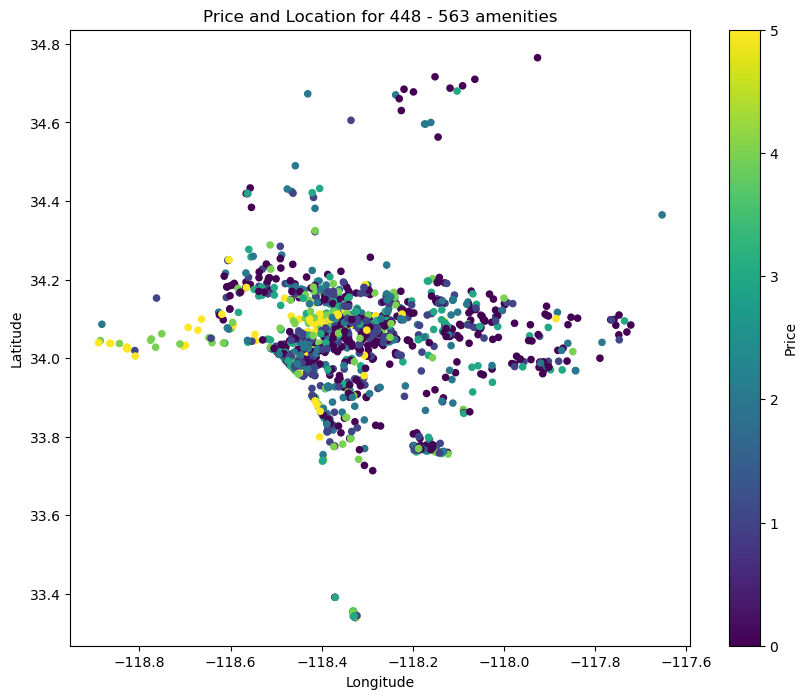

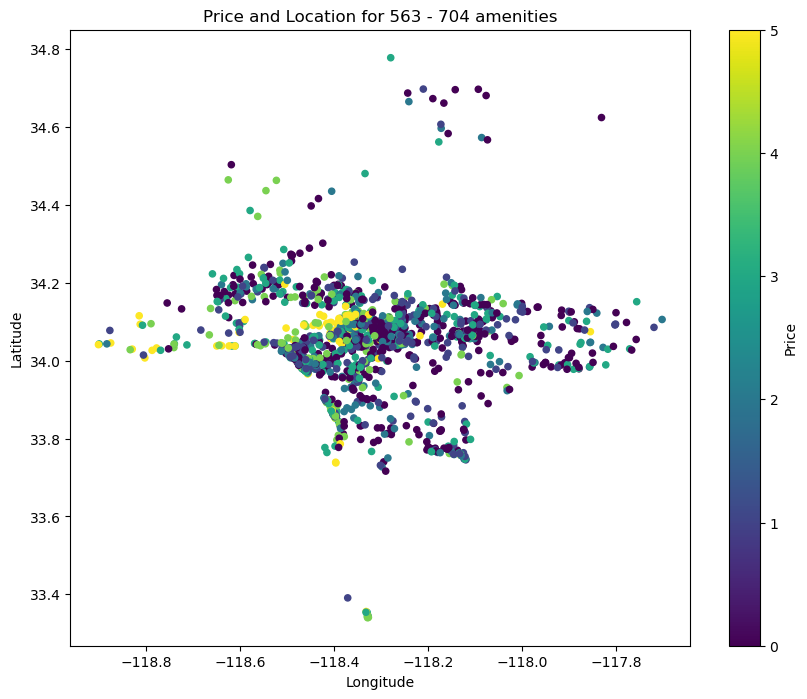

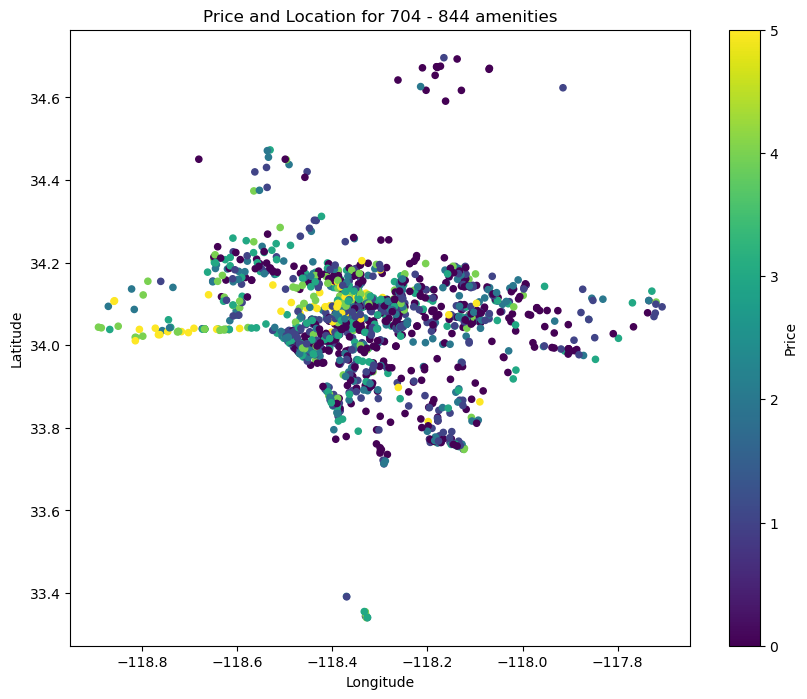

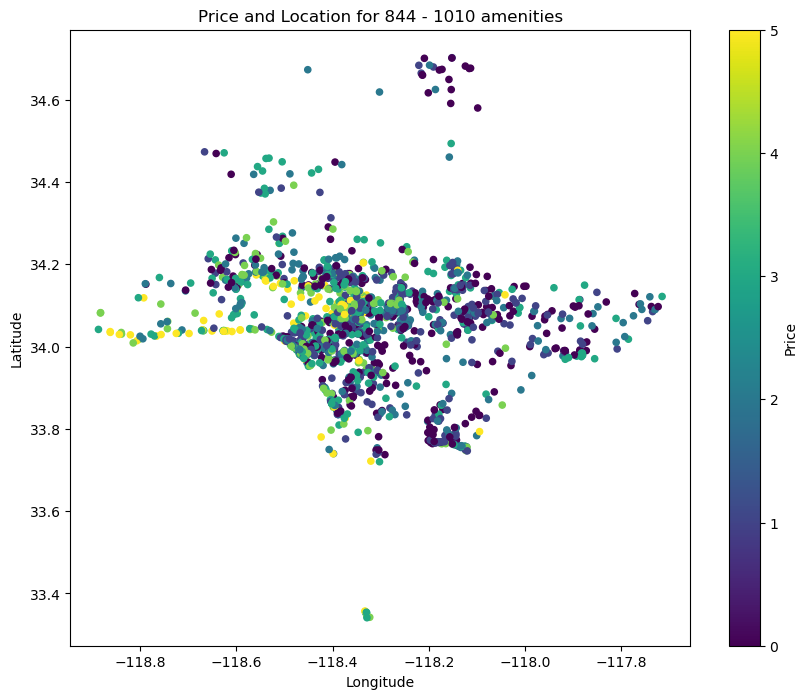

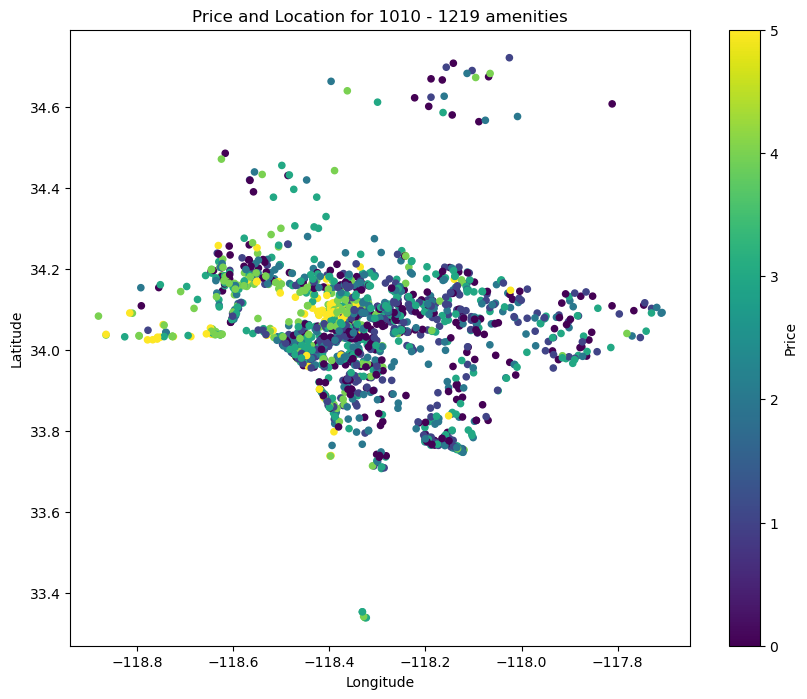

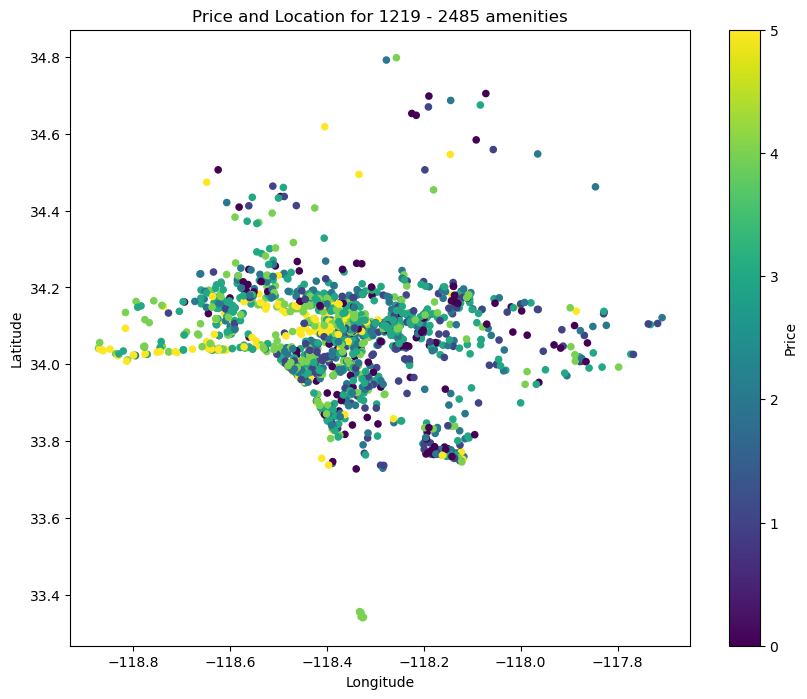

In [27]:
ranges = [0, 219, 324, 448, 563, 704, 844, 1010, 1219, 2485]

mask = []
for val in data['amenities'].values:
    num = len(val)
    for i in range(len(ranges) - 1):
        if num < ranges[i+1]:
            mask.append(i)
            break

# Iterate over each range of number of amenities
for i in range(len(ranges) - 1):
    # Handle listings with the specified number of amenities
    current_mask = [mask[j] == i for j in range(len(mask))]
    current_data = data[current_mask]
    
    # Scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(current_data['longitude'], current_data['latitude'], c=current_data['price'], cmap='viridis', s=20)

    # Add colorbar
    plt.colorbar(scatter, label='Price')

    # Set labels and title
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'Price and Location for {ranges[i]} - {ranges[i+1]} amenities')

    # Show the plot
    plt.show()